In [1]:
## PART 2
import pandas as pd


df = pd.read_csv('troop_movements.csv')

df.head()



,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-08 15:48:18,1,tie_silencer,empire,8,6,2,9,Shili
1,2025-07-08 15:48:17,2,tie_fighter,empire,5,8,8,5,Toydaria
2,2025-07-08 15:48:16,3,at-at,resistance,10,8,5,6,Muunilinst
3,2025-07-08 15:48:15,4,tie_silencer,resistance,2,3,3,6,Concord Dawn
4,2025-07-08 15:48:14,5,unknown,empire,5,10,4,7,Ryloth


In [2]:
df["empire_or_resistance"].value_counts().reset_index()
 

,empire_or_resistance,count
0,resistance,513
1,empire,487


In [3]:
df["homeworld"].value_counts().reset_index()

,homeworld,count
0,Ryloth,34
1,Zolan,33
2,Haruun Kal,33
3,Trandosha,33
4,Mon Cala,32
5,Cerea,32
6,Tatooine,31
7,Vulpter,29
8,Toydaria,28
9,Shili,27


In [4]:
df['unit_type'].value_counts().reset_index()

,unit_type,count
0,resistance_soldier,141
1,tie_fighter,128
2,stormtrooper,127
3,unknown,126
4,tie_silencer,125
5,at-at,119
6,at-st,119
7,x-wing,115


In [5]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-08 15:48:18,1,tie_silencer,empire,8,6,2,9,Shili,False
1,2025-07-08 15:48:17,2,tie_fighter,empire,5,8,8,5,Toydaria,False
2,2025-07-08 15:48:16,3,at-at,resistance,10,8,5,6,Muunilinst,True
3,2025-07-08 15:48:15,4,tie_silencer,resistance,2,3,3,6,Concord Dawn,True
4,2025-07-08 15:48:14,5,unknown,empire,5,10,4,7,Ryloth,False


<Axes: xlabel='empire_or_resistance', ylabel='count'>

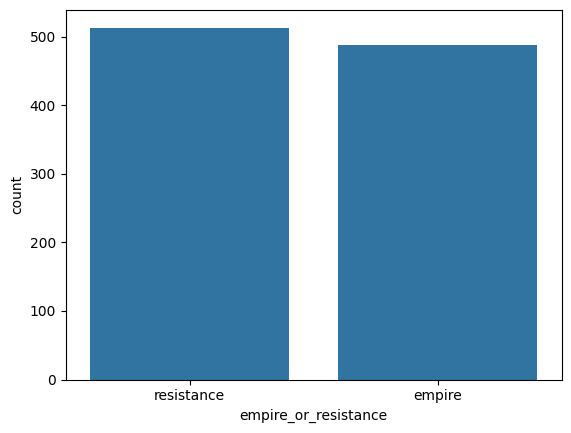

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data= df["empire_or_resistance"].value_counts())

In [7]:
import sklearn
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

le = LabelEncoder()

df_dummy = pd.get_dummies(df[['homeworld', 'unit_type']])

X = df_dummy
y = df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

dtc = sklearn.tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

preditction = dtc.predict(X_test)
print(accuracy_score(y_test, preditction))



0.68


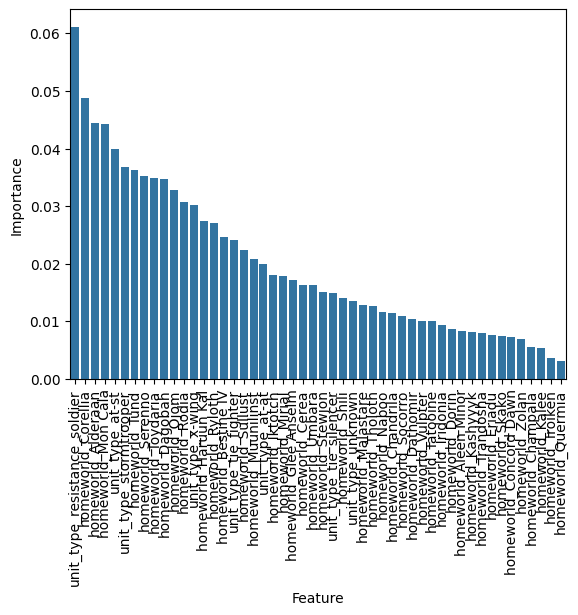

In [9]:
importances = dtc.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})
feature_importances = feature_importances.sort_values(by='Importance',ascending=False)
sns.barplot(feature_importances, x='Feature', y='Importance')

plt.xticks(rotation=90)
plt.show()



In [10]:
import pickle

with open('trained_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)